

## 1) Mounting Google Colab with Google Drive



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2) Counting Types of Images Collected



In [2]:
import glob
DIR = "/content/drive/My Drive/Data/All Fish JPG/"
PNG_counter = len(glob.glob1(DIR,"*.png"))
JPG_counter = len(glob.glob1(DIR,"*.jpg"))

print("There are",PNG_counter,"PNG images and", JPG_counter, "JPG images collected")

There are 0 PNG images and 222 JPG images collected


## 3) Putting Image Paths in List

In [3]:
from PIL import Image
import numpy as np
import sys
import os
import csv

# default format can be changed as needed
def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList(DIR)

print("\nThere are",len(myFileList),"images read by Python")

myFileList

/content/drive/My Drive/Data/All Fish JPG/

There are 222 images read by Python


['/content/drive/My Drive/Data/All Fish JPG/4_51093424656_o.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/1_51093423561_o.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/2_51093424581_o.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/3_51093502544_o.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/8_51093965763_o.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/17_51093423596_o.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/13_51094236025_o.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/6_51093502659_o.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/19_51094236135_o.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/9_51093965788_o.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/7_51093519907_o.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/10_51094235970_o.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/16_51093966053_o.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/11_51093502764_o.jpg',
 '/content/drive/My Drive/Data/All Fish JPG/12_51093502794_o.jpg',
 '/

## 4) Reading Images in Colour & Illustrating them

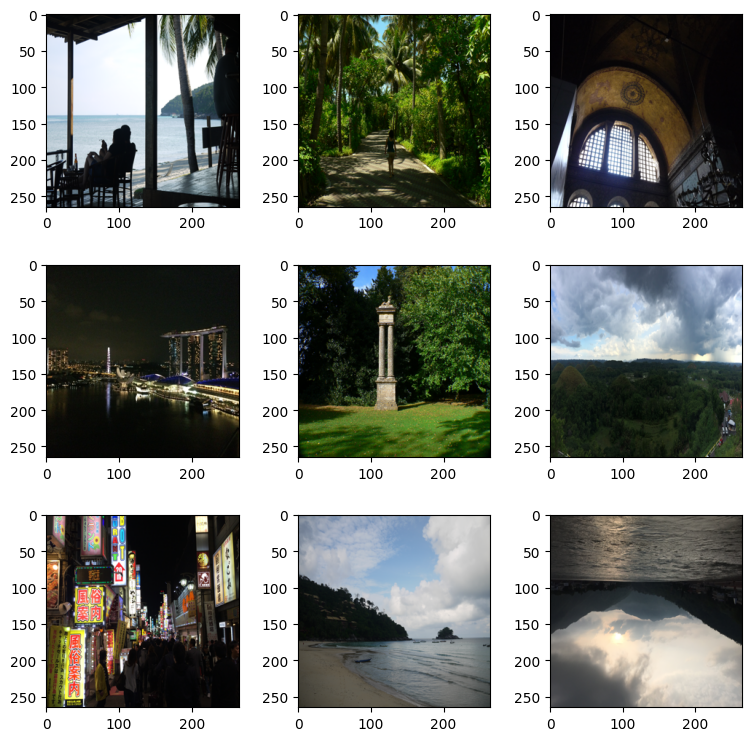

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
    img = Image.open(myFileList[i])
    img = img.resize((265,265))
    # Plot image.
    ax.imshow(img, cmap='binary')

## 5) Resizing & Normalising the Images

In [5]:
import cv2 as cv
import numpy as np
from tqdm import tqdm

images = []
processed_images = []

for index in tqdm(range(len(myFileList))):
    image = cv.imread(myFileList[index], cv.IMREAD_COLOR)  # uint8 image
    small_image = cv.resize(image,(50,50))
    norm_image = cv.normalize(small_image, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
    images.append(image)
    processed_images.append(norm_image)

100%|██████████| 222/222 [00:25<00:00,  8.87it/s]


In [6]:
images[0].shape

(3000, 4000, 3)

In [7]:
processed_images[0].shape

(50, 50, 3)

## 6) Visualising Normalised Images

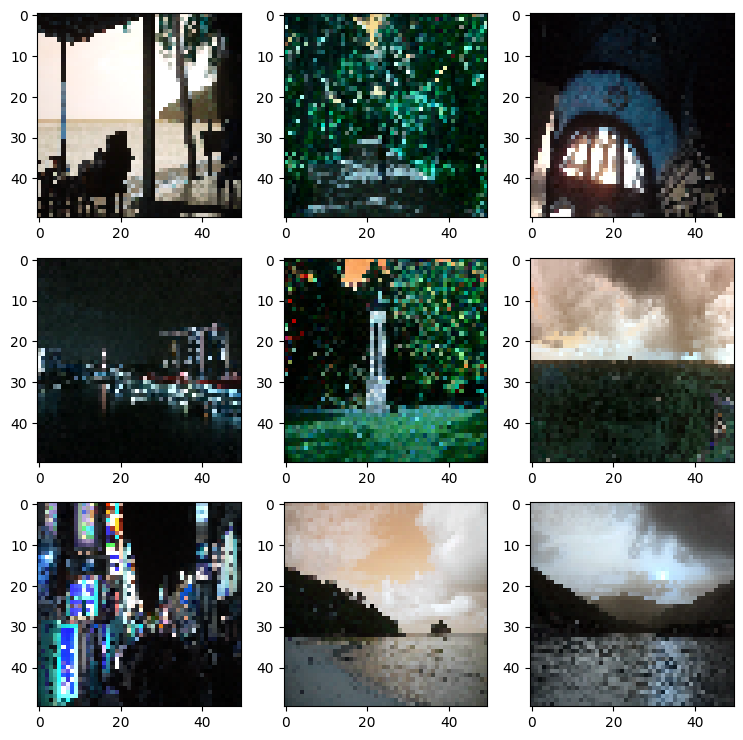

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    # Plot image.
    ax.imshow(processed_images[i], cmap='binary')

## 7) Flattening the Images' pixels into Dataframe

In [10]:
from tqdm import tqdm
import pandas as pd

flattened_data = []

for index in tqdm(range(len(processed_images))):
    flattened = processed_images[index].flatten()
    flattened_data.append(flattened)

# Convert all at once
flatten_df = pd.DataFrame(flattened_data)

flatten_df


100%|██████████| 222/222 [00:00<00:00, 86120.56it/s]


,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.047059,0.050980,0.050980,0.035294,0.027451,0.011765,0.047059,0.035294,0.035294,0.047059,...,0.027451,0.019608,0.019608,0.019608,0.015686,0.019608,0.011765,0.015686,0.015686,0.015686
1,0.000000,0.082353,0.082353,0.000000,0.082353,0.090196,0.000000,0.086275,0.070588,0.003922,...,0.380392,0.039216,0.203922,0.141176,0.474510,0.592157,0.592157,0.000000,0.176471,0.247059
2,0.023622,0.011811,0.019685,0.019685,0.007874,0.015748,0.019685,0.011811,0.011811,0.011811,...,0.527559,0.023622,0.031496,0.035433,0.031496,0.023622,0.031496,0.023622,0.019685,0.027559
3,0.043137,0.066667,0.062745,0.066667,0.078431,0.082353,0.039216,0.054902,0.047059,0.047059,...,0.031373,0.003922,0.011765,0.015686,0.019608,0.027451,0.027451,0.047059,0.062745,0.066667
4,0.019608,0.027451,0.027451,0.031373,0.054902,0.000000,0.000000,0.031373,0.019608,0.196078,...,0.027451,0.003922,0.105882,0.043137,0.015686,0.074510,0.007843,0.000000,0.019608,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0.664032,0.604743,0.553360,0.628458,0.561265,0.494071,0.703557,0.648221,0.577075,0.754941,...,0.043478,0.090909,0.110672,0.106719,0.118577,0.114625,0.122530,0.102767,0.114625,0.130435
218,0.741176,0.521569,0.407843,0.745098,0.525490,0.411765,0.752941,0.525490,0.411765,0.749020,...,0.513726,0.239216,0.313726,0.450980,0.192157,0.254902,0.400000,0.141176,0.196078,0.321569
219,1.000000,0.768628,0.674510,0.996078,0.752941,0.658824,0.996078,0.745098,0.650980,0.992157,...,0.058824,0.203922,0.129412,0.109804,0.172549,0.105882,0.094118,0.172549,0.105882,0.082353
220,0.727273,0.750988,0.770751,0.758893,0.798419,0.826087,0.778656,0.826087,0.841897,0.739130,...,0.059289,0.047431,0.047431,0.043478,0.039526,0.047431,0.047431,0.055336,0.051383,0.071146


## 8) Saving the Dataframe into CSV Format

In [11]:
flatten_df.to_csv('/content/drive/My Drive/Data/CSV Converted Small Images (Colour).csv', index = False,header=False)

---